 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [101]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [102]:
whale_returns_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\whale_returns.csv")
algo_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\algo_returns.csv")
sptsx_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\sp_tsx_history.csv")

In [103]:
# Reading whale returns
whales_df = pd.read_csv(whale_returns_path)
whales_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [104]:
# Count nulls
whales_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [105]:
# Drop nulls
whales_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [106]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [107]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [108]:
# Drop nulls
algo_df.dropna(inplace=True)

In [109]:
# set date as index for all dataframes
whales_df = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [139]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(sptsx_path)
sp_tsx_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [140]:
# Check Data Types
sp_tsx_df.dtypes

Date     object
Close    object
dtype: object

In [145]:
# Fix Data Types - clean 'Close' data column in order to convert to integer
for col in sp_tsx_df.columns:
    # Check if the column contains dollar signs
    if sp_tsx_df['Close'].dtype == 'object' and '$' and ',' in sp_tsx_df[col].iloc[1]:
        # Replace the dollar signs with an empty string
        sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
        sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df.head()

C:\Users\juddm\AppData\Local\Temp\ipykernel_22608\664540640.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [146]:
# fix data types (convert data type to integer)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float').astype('int')

In [151]:
# set date as index for sp_tsx_df

sp_tsx_df = pd.read_csv(sptsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Fix Data Types - clean 'Close' data column in order to convert to integer
for col in sp_tsx_df.columns:
    # Check if the column contains dollar signs
    if sp_tsx_df['Close'].dtype == 'object' and '$' and ',' in sp_tsx_df[col].iloc[1]:
        # Replace the dollar signs with an empty string
        sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
        sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df.head()

# fix data types (convert data type to integer)
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float').astype('int')

#calculate percent returns
sp_daily_returns = sp_tsx_df.pct_change()

sp_daily_returns

C:\Users\juddm\AppData\Local\Temp\ipykernel_22608\495992803.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330
...,...
2019-12-20,0.003165
2019-12-23,0.000584
2019-12-24,0.003036


In [124]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)

In [152]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.rename(columns={'Close': 'SP_TSX_Close'}, inplace=True)
sp_daily_returns.head()

,SP_TSX_Close
Date,
2012-10-01,NaN
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [154]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whales_df, algo_df, sp_daily_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001969
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008582
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003370
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001392
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009998
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000603
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002232
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000783


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

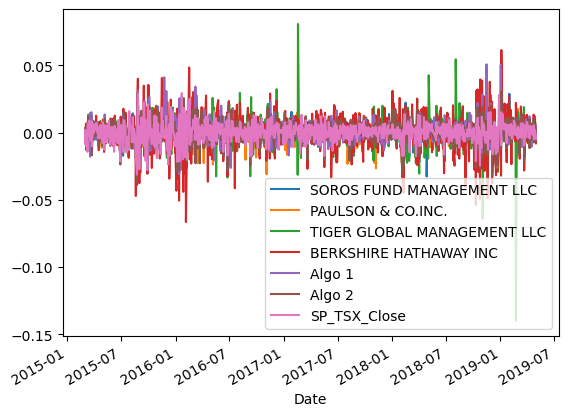

In [155]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

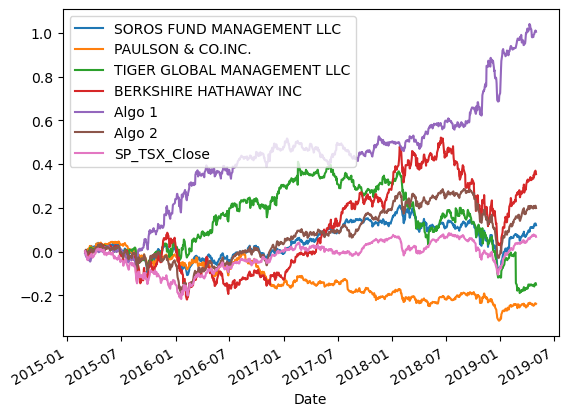

In [156]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() - 1


# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

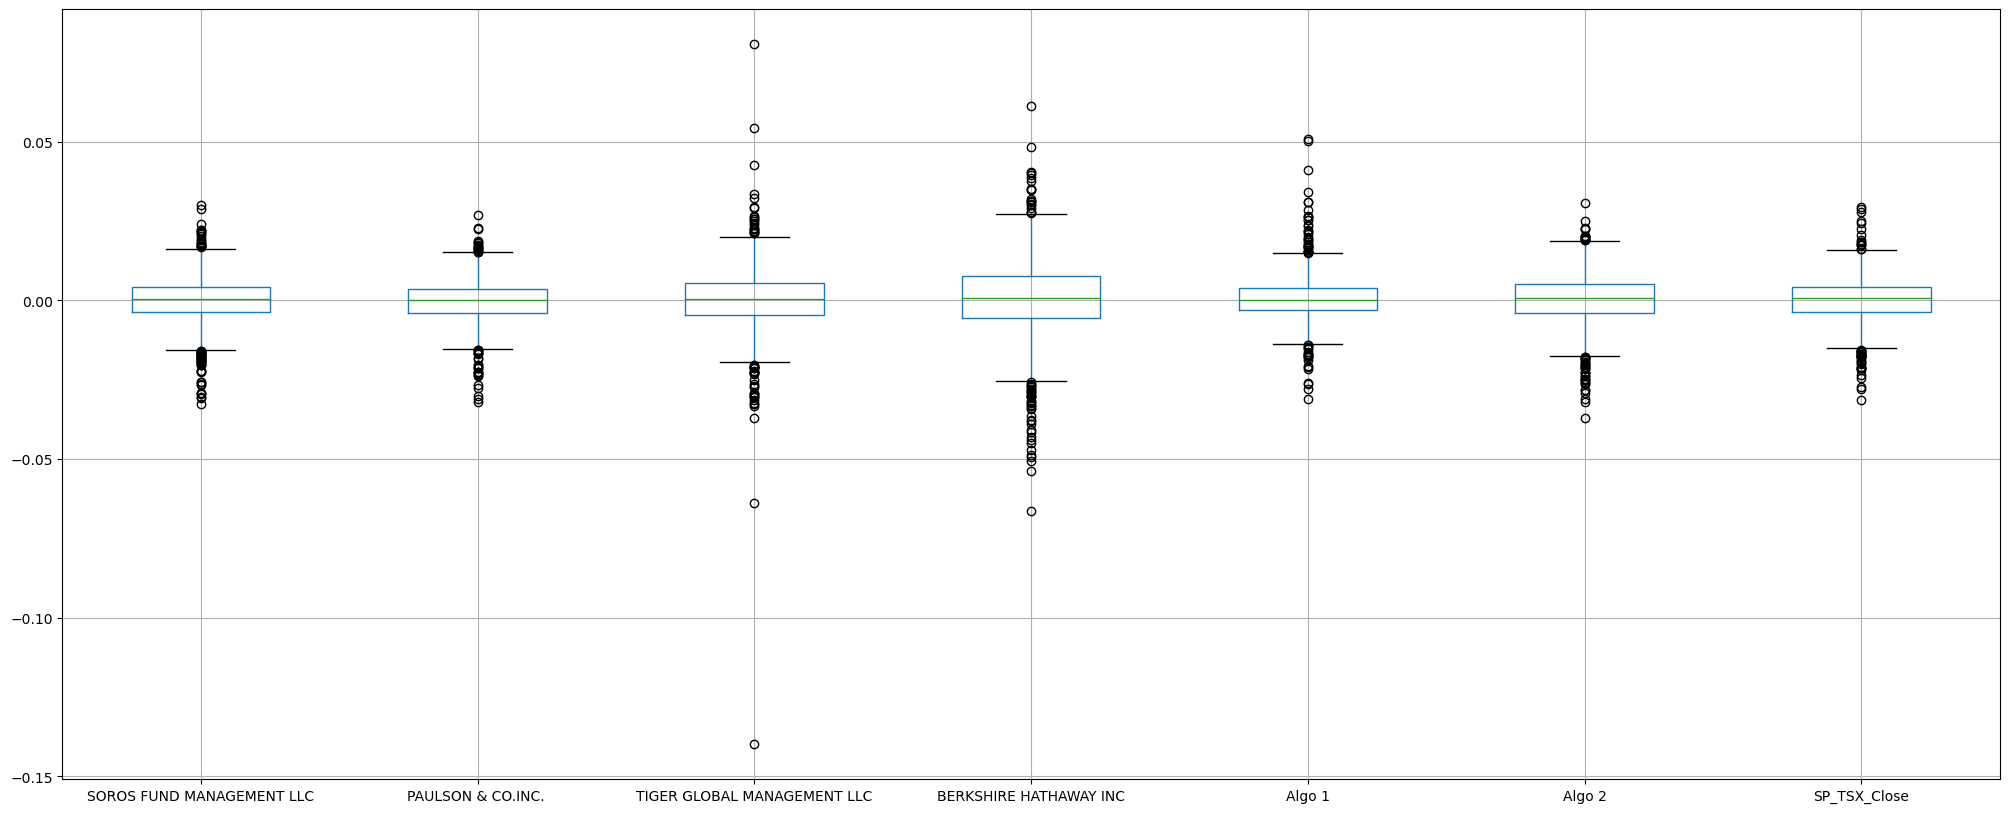

In [172]:
# Box plot to visually show risk

combined_df.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [174]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007590
Algo 2                         0.008323
SP_TSX_Close                   0.007032
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate the daily standard deviation of S&P TSX 60

"As indicated above the daily standard deviation of S&P TSX 60 is 0.007032."

# Determine which portfolios are riskier than the S&P TSX 60

"Every portfolio is riskier than S&P TSX 60 other than Pauls & Co Inc."

### Calculate the Annualized Standard Deviation

In [177]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = combined_df.std() * np.sqrt(252)
annualized_volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120491
Algo 2                         0.132121
SP_TSX_Close                   0.111632
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

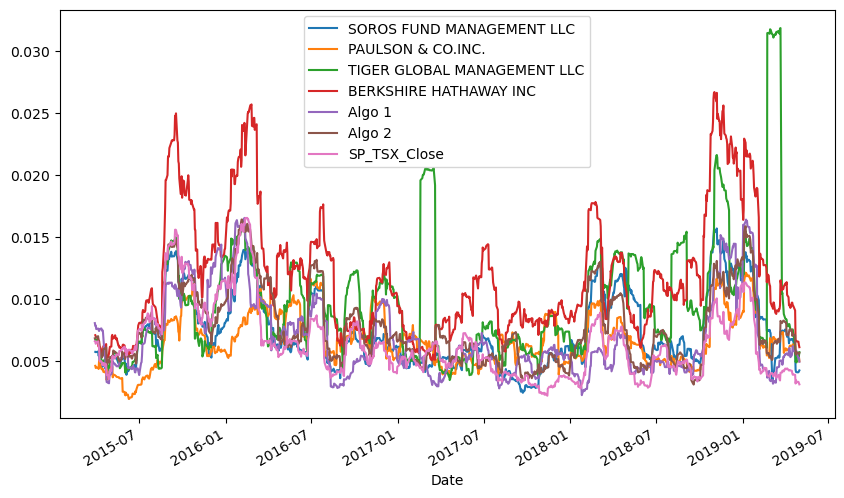

In [179]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation

rolling_std.plot(figsize=(10,6))

### Calculate and plot the correlation

<Axes: >

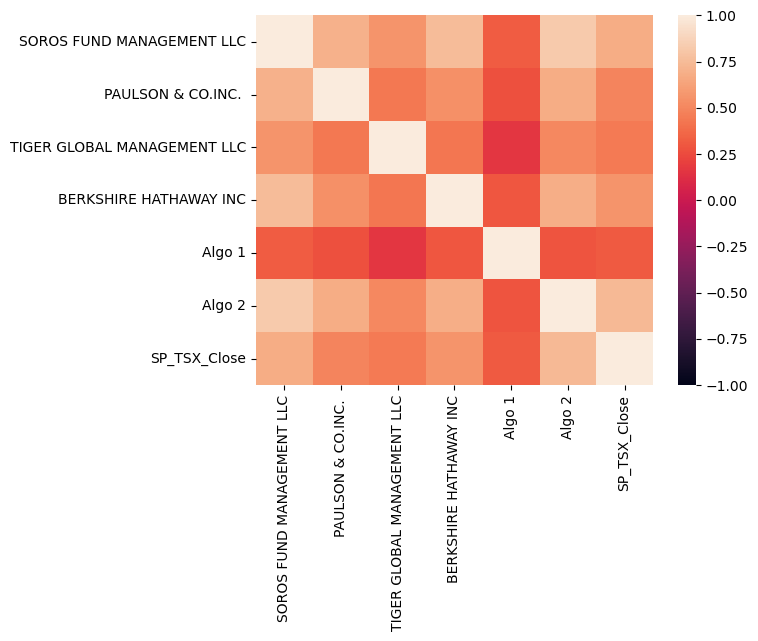

In [181]:
# Calculate the correlation
import seaborn as sns
return_correlation = combined_df.corr()

# Display the correlation matrix

sns.heatmap(return_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [189]:
# Calculate covariance of a single portfolio

covariance_matrix = combined_df.cov()
covariance_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
SOROS FUND MANAGEMENT LLC,0.000061,0.000038,0.000048,0.000075,0.000019,0.000054,0.000037
PAULSON & CO.INC.,0.000038,0.000049,0.000033,0.000048,0.000014,0.000039,0.000024
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000118,0.000059,0.000013,0.000046,0.000034
BERKSHIRE HATHAWAY INC,0.000075,0.000048,0.000059,0.000164,0.000028,0.000073,0.000050
Algo 1,0.000019,0.000014,0.000013,0.000028,0.000058,0.000018,0.000017
Algo 2,0.000054,0.000039,0.000046,0.000073,0.000018,0.000069,0.000043
SP_TSX_Close,0.000037,0.000024,0.000034,0.000050,0.000017,0.000043,0.000049


<Axes: title={'center': 'SP TSX Return Beta'}>

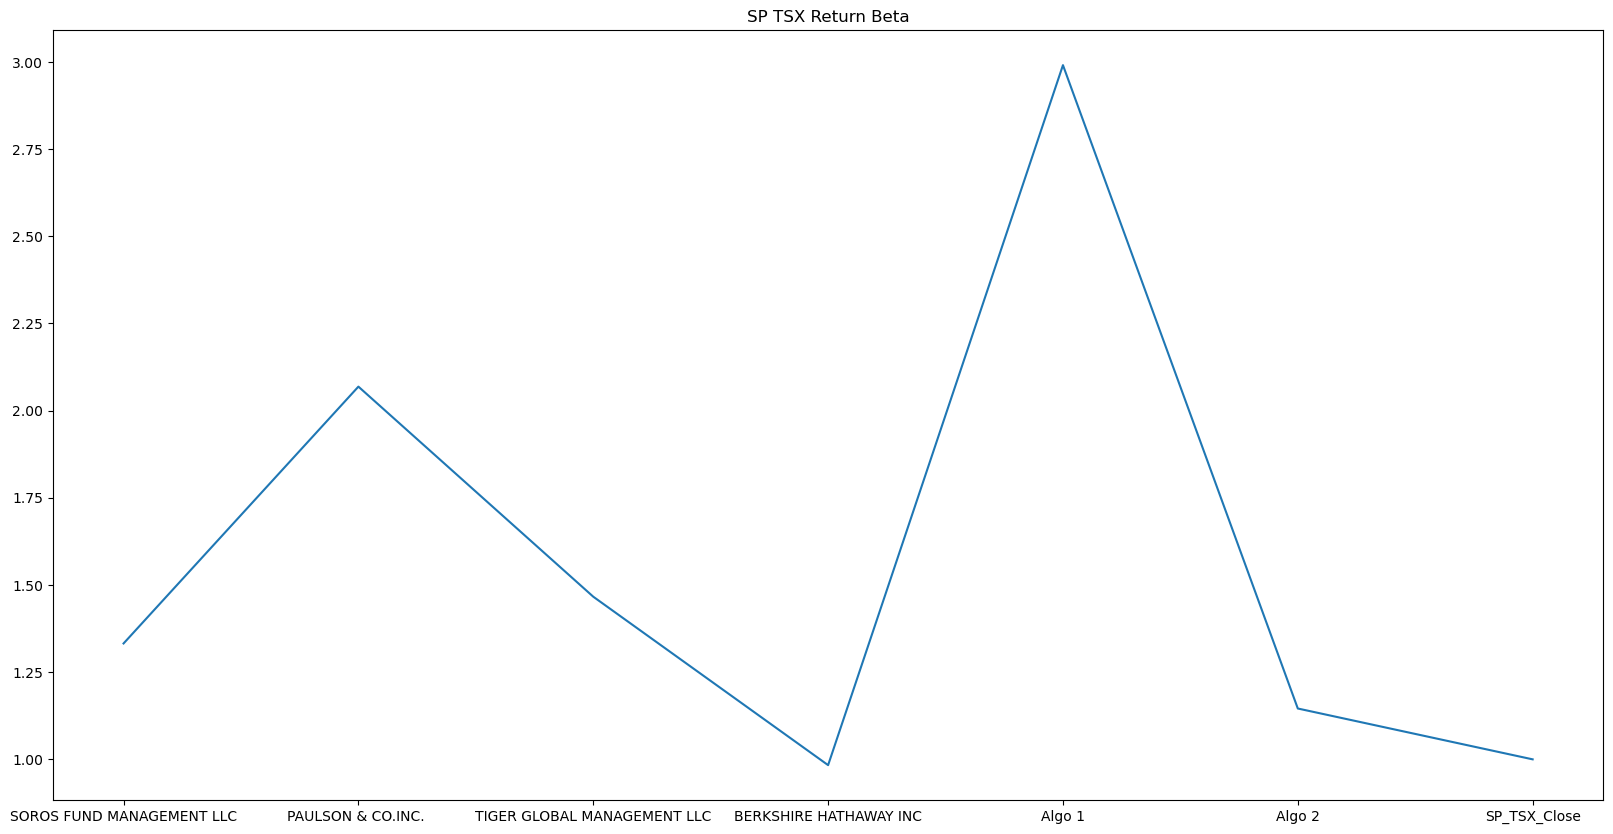

In [215]:
# Calculate variance of S&P TSX

sp_tsx_var = combined_df['SP_TSX_Close'].var()

# Computing beta

sp_tsx_beta = sp_tsx_var / covariance_matrix

# Plot beta trend
sp_tsx_beta['SP_TSX_Close'].plot(figsize=(20,10), title='SP TSX Return Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [219]:
# Use `ewm` to calculate the rolling window

half_life = 21

# Calculate the EWMA of standard deviation for each portfolio
combined_ewm_std = combined_df.ewm(halflife=half_life).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [223]:
# Annualized Sharpe Ratios

sharpe_ratios = ((combined_df.mean()-combined_df['Algo 1'].mean()) * 252) / (combined_df.std() * np.sqrt(252))

SOROS FUND MANAGEMENT LLC     -1.141857
PAULSON & CO.INC.             -2.149096
TIGER GLOBAL MANAGEMENT LLC   -1.171969
BERKSHIRE HATHAWAY INC        -0.404827
Algo 1                         0.000000
Algo 2                        -0.941032
SP_TSX_Close                  -1.390607
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

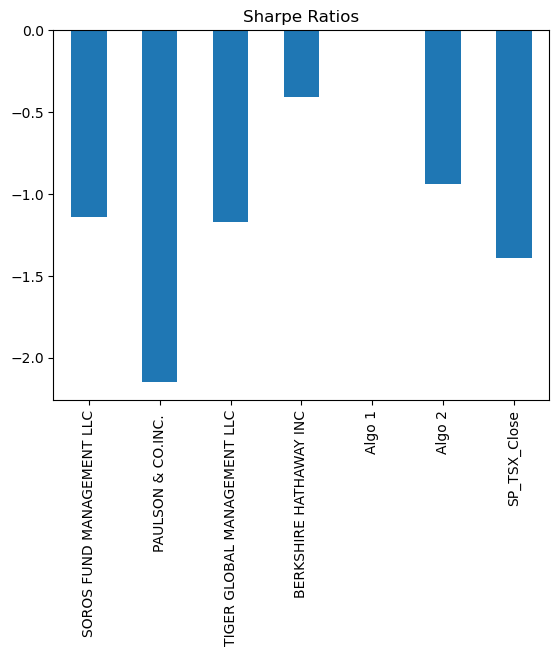

In [224]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algo strategies outperform the market and the majority of the whales portfolio. Berkshire Hathaway Inc in the whales portfolio does better than aglo strategy 2.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [256]:
# Reading data from 1st stock
l_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\l_historical.csv")

l_df = pd.read_csv(l_path)

l_df = pd.read_csv(l_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [232]:
# Reading data from 2nd stock
otex_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\otex_historical.csv")

otex_df = pd.read_csv(otex_path)

otex_df = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [233]:
# Reading data from 3rd stock
shop_path = Path(r"C:\Users\juddm\OneDrive\Desktop\School\Assignment 4\shop_historical.csv")

shop_df = pd.read_csv(shop_path)

shop_df = pd.read_csv(shop_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [319]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner") 
custom_df

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39


In [320]:
# Reorganize portfolio data by having a column per symbol

# Rename Columns
custom_df.columns.values[1] = 'L Close'
custom_df.columns.values[3] = 'OTEX Close'
custom_df.columns.values[5] = 'SHOP Close'

In [321]:
# Delete redundant columns

custom_df = custom_df.drop('Symbol', axis=1)

In [322]:
# Calculate daily returns

custom_returns = custom_df.pct_change()

# Drop NAs

custom_returns.dropna(inplace=True)

# Display sample data

custom_returns.head()

,L Close,OTEX Close,SHOP Close
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [336]:
# Set weights

L_weight = 1/3
OTEX_weight = 1/3
SHOP_weight = 1/3

# Calculate portfolio return

portfolio_returns = L_weight * custom_returns["L Close"] + OTEX_weight * custom_returns["OTEX Close"] + SHOP_weight * custom_returns["SHOP Close"]

# Display sample data

portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [356]:
# Join your returns DataFrame to the original returns DataFrame

appended_df = pd.concat([custom_returns, portfolio_returns], axis="columns", join="inner") 


In [357]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
appended_df.dropna(inplace=True)

# rename overall portfolio return column 

appended_df.columns.values[3] = 'Overall Close'

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [358]:
# Calculate the annualized `std`

custom_volatility = appended_df.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

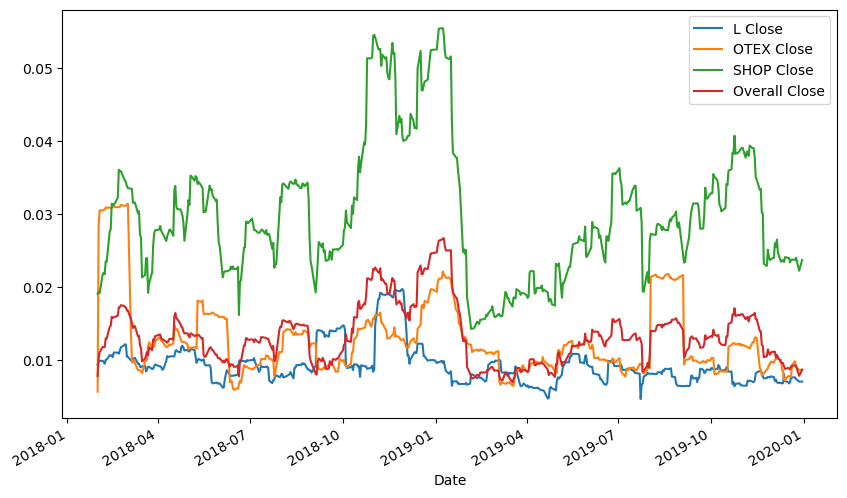

In [359]:
# Calculate rolling standard deviation

custom_rolling_std = appended_df.rolling(window=21).std()

# Plot rolling standard deviation

custom_rolling_std.plot(figsize=(10,6))

### Calculate and plot the correlation

<Axes: >

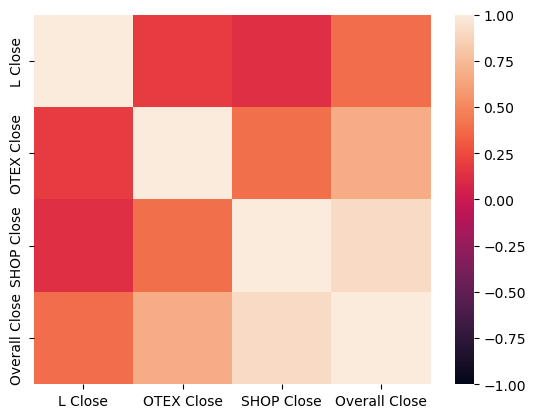

In [360]:
# Calculate and plot the correlation

custom_return_correlation = appended_df.corr()

sns.heatmap(custom_return_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of my Portfolio vs S&P 60 TSX'}, xlabel='Date'>

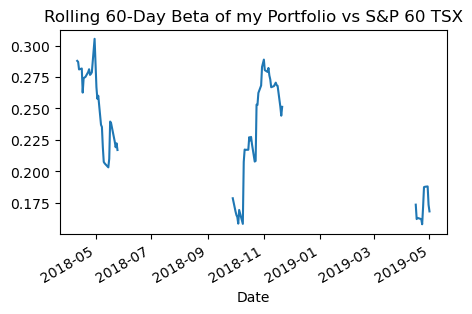

In [362]:
# Calculate and plot Beta
rolling_variance = appended_df['Overall Close'].rolling(window=60).var()

rolling_covariance = appended_df['Overall Close'].rolling(window=60).cov(combined_df['SP_TSX_Close'])

custom_rolling_beta = rolling_covariance / rolling_variance

custom_rolling_beta.plot(figsize=(5,3), title='Rolling 60-Day Beta of my Portfolio vs S&P 60 TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [365]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = ((appended_df.mean()-appended_df["Overall Close"].mean()) * 252) / (appended_df.std() * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

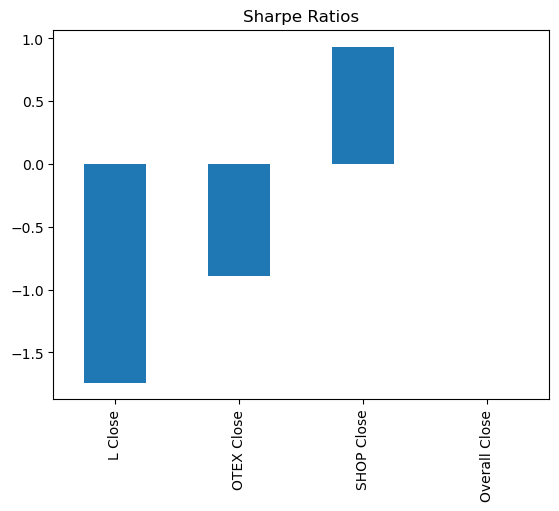

In [366]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Throughout the 60-day rolling beta plotted above, my portfolio consistenly has a positive beta which means it is more volatile than the market (S&P/TSX 60). Based on the overall portfolio returns Sharpe Ratios, the portfolio performs positively against individual L and OTEX equity respectively. 